## Get the stemmed data using the same process you did in Week 3.

In [137]:
import pandas as pd 

In [138]:
movrev_df = pd.read_csv("Data/labeledTrainData.tsv", sep='\t')
movrev_df.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [139]:
# Part 2:

movrev_df.review = movrev_df.review.str.lower()           # Converting review column text to lowercase.      

In [140]:
import string                                            # Removing punctuation and special characters from the text.
  
movrev_df.review = movrev_df.review.str.translate(str.maketrans('', '', string.punctuation))

In [141]:
from nltk.corpus import stopwords                    # Removing the stop words.

stop_words = stopwords.words('english')

movrev_df.review = movrev_df.review.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))          

In [142]:
from nltk.stem.porter import PorterStemmer       # Applying NLTK’s PorterStemmer.

porter = PorterStemmer()                         # Creating the stemmer.         

movrev_df.review = movrev_df.review.apply(lambda x: ' '.join([porter.stem(word) for word in x.split()]))      # Applying the stemmer.   

## Split this into a training and test set.

In [143]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [144]:
X = movrev_df['review']                 # Choosing the Predictor column.

y = movrev_df['sentiment']              # Choosing the target column.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)  # Splitting data into training and testing sets.

## Fit and apply the tf-idf vectorization to the training set.

In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfs = TfidfVectorizer()            # Creating the tf-idf vectorization.

X_train_matrix = tfidfs.fit_transform(X_train)   # Applying the tf-idf vectorization to the training set.

X_train_matrix.shape                # Checking the shape to validate.

(20000, 81457)

## Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?).

In [146]:
X_test_matrix = tfidfs.transform(X_test)      # Applying the tf-idf vectorization to the testing set.

X_test_matrix.shape            # Checking the shape to validate.

(5000, 81457)

Why? - Its because if we fit the tf-idf vectorization to the test set, training our model might introduce some data leakage and hence yield in too optimistic performance measures. 

## Train a logistic regression using the training data.

In [147]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(random_state=0)     # Creating logistic regression object.

y_test_pred = logistic_regression.fit(X_train_matrix, y_train).predict(X_test_matrix)   # Training model and make predictions.

## Find the model accuracy on test set.

In [148]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)       # Calculating accuracy

0.8882

The accuracy is 88.9%

## Create a confusion matrix for the test set predictions.

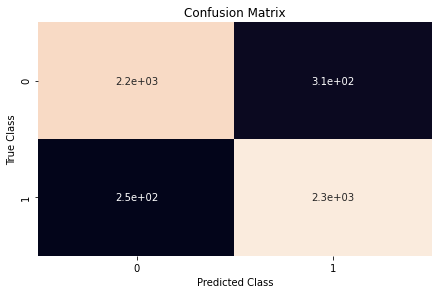

In [149]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt

matrix = confusion_matrix(y_test, y_test_pred)       # Creating the confusion matrix

df = pd.DataFrame(matrix)

sb.heatmap(df, annot=True, cbar=None)               # Creating the Heatmap
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

## Get the precision, recall, and F1-score for the test set predictions.

In [150]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = "{:.0%}".format(precision_score(y_test, y_test_pred))    # Calculating the precision
recall = "{:.0%}".format(recall_score(y_test, y_test_pred))      # Calculating the recall
f1_score = "{:.0%}".format(f1_score(y_test, y_test_pred))         # Calculating the F1-score

print("Precision:",precision)
print("Recall:",recall)
print("F1-score:",f1_score)

Precision: 88%
Recall: 90%
F1-score: 89%


## Create a ROC curve for the test set.

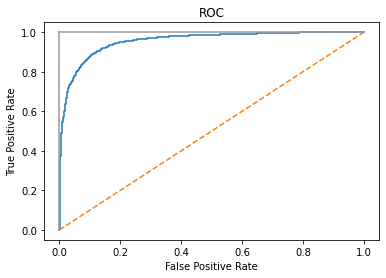

In [151]:
from sklearn.metrics import roc_curve, roc_auc_score

target_prob = logistic_regression.predict_proba(X_test_matrix)[:,1]  # Getting the predicted probabilities

false_pos_rate, true_pos_rate, threshold = roc_curve(y_test, target_prob)   # Creating the true and false positive rates

plt.title("ROC")              # Plotting the ROC curve
plt.plot(false_pos_rate, true_pos_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".6"), plt.plot([1, 1] , c=".6")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()


## Pick another classification model you learned about this week and repeat steps (5) – (9).

### Train a random forest using the training data

In [152]:
from sklearn.ensemble import RandomForestClassifier  

randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)    # Creating random forest classifier object

rf_model_pred = randomforest.fit(X_train_matrix, y_train).predict(X_test_matrix)  # Training the model and predicting


### Find the model accuracy on test set.

In [153]:
accuracy_score(y_test, rf_model_pred)        # Calculating the accuracy

0.8488

The accuracy is 84.8%

### Create a confusion matrix for the test set predictions.

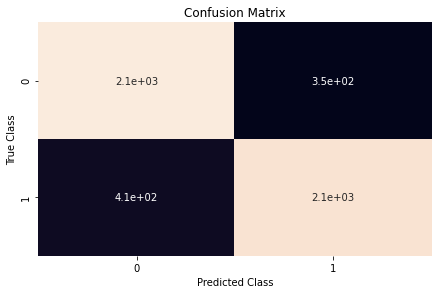

In [154]:
matrix_rf = confusion_matrix(y_test, rf_model_pred)       # Creating confusion matrix

df_rf = pd.DataFrame(matrix_rf)              

sb.heatmap(df_rf, annot=True, cbar=None)      # Creating the heatmap
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

### Get the precision, recall, and F1-score for the test set predictions.

In [155]:
from sklearn.metrics import precision_score, recall_score, f1_score

Precision_rf = "{:.0%}".format(precision_score(y_test, rf_model_pred))     # Calculating the precision
Recall_rf = "{:.0%}".format(recall_score(y_test, rf_model_pred))       # Calculating the recall
f1_score_rf = "{:.0%}".format(f1_score(y_test, rf_model_pred))         # Calculating the F1-score

print("Precision:",Precision_rf)
print("Recall:",Recall_rf)
print("F1-score:",f1_score_rf)

Precision: 86%
Recall: 84%
F1-score: 85%


### Create a ROC curve for the test set.

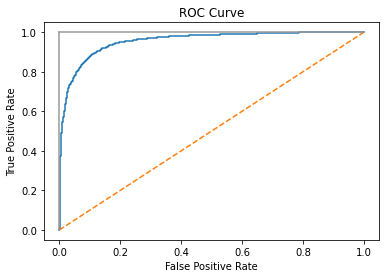

In [156]:
target_prob_rf = randomforest.predict_proba(X_test_matrix)[:,1]     # Getting predicted probabilities
false_pos_rate_rf, true_pos_rate_rf, threshold_rf = roc_curve(y_test, target_prob)  # Creating the true and false positive rates

plt.title("ROC Curve")       # Plotting the ROC curve
plt.plot(false_pos_rate_rf, true_pos_rate_rf)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".6"), plt.plot([1, 1] , c=".6")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()